# <b>PHASE 1

### Importing necessary libraries

In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('Train_Data.csv')
test=pd.read_csv('Test_Data.csv')

In [9]:
train['dsthostsamesrcportrate'].describe()

count    86845.000000
mean         0.075810
std          0.208388
min          0.000000
25%          0.000000
50%          0.000000
75%          0.020000
max          1.000000
Name: dsthostsamesrcportrate, dtype: float64

### Searching for missing values

<Axes: >

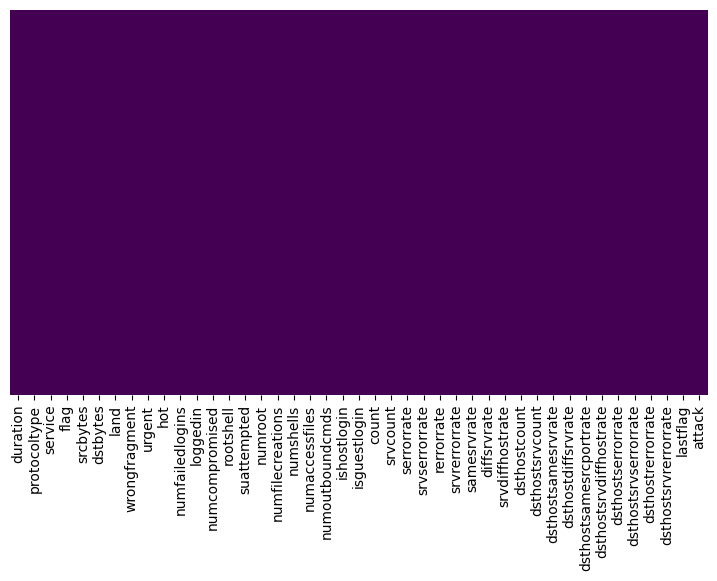

In [3]:
plt.figure(figsize=(9,5))
sns.heatmap(train.isnull(), cmap='viridis', cbar=False, yticklabels=False)

### Catagorising Data

In [4]:
numerical = train.select_dtypes(include=[np.number]).columns
categorical = train.select_dtypes(exclude=[np.number]).columns
numerical_test = test.select_dtypes(include=[np.number]).columns
categorical_test = test.select_dtypes(exclude=[np.number]).columns
print("Numerical columns:", numerical)
print("Categorical columns:", categorical)
print("Numerical columns:", numerical_test)
print("Categorical columns:", categorical_test)

Numerical columns: Index(['duration', 'srcbytes', 'dstbytes', 'land', 'wrongfragment', 'urgent',
       'hot', 'numfailedlogins', 'loggedin', 'numcompromised', 'rootshell',
       'suattempted', 'numroot', 'numfilecreations', 'numshells',
       'numaccessfiles', 'numoutboundcmds', 'ishostlogin', 'isguestlogin',
       'count', 'srvcount', 'serrorrate', 'srvserrorrate', 'rerrorrate',
       'srvrerrorrate', 'samesrvrate', 'diffsrvrate', 'srvdiffhostrate',
       'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate',
       'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'lastflag'],
      dtype='object')
Categorical columns: Index(['protocoltype', 'service', 'flag', 'attack'], dtype='object')
Numerical columns: Index(['duration', 'srcbytes', 'dstbytes', 'land', 'wrongfragment', 'urgent',
       'hot', 'numfailedlogins', 'loggedin', 'numcompromised', 'roots

### Ploting Correlation Matrix

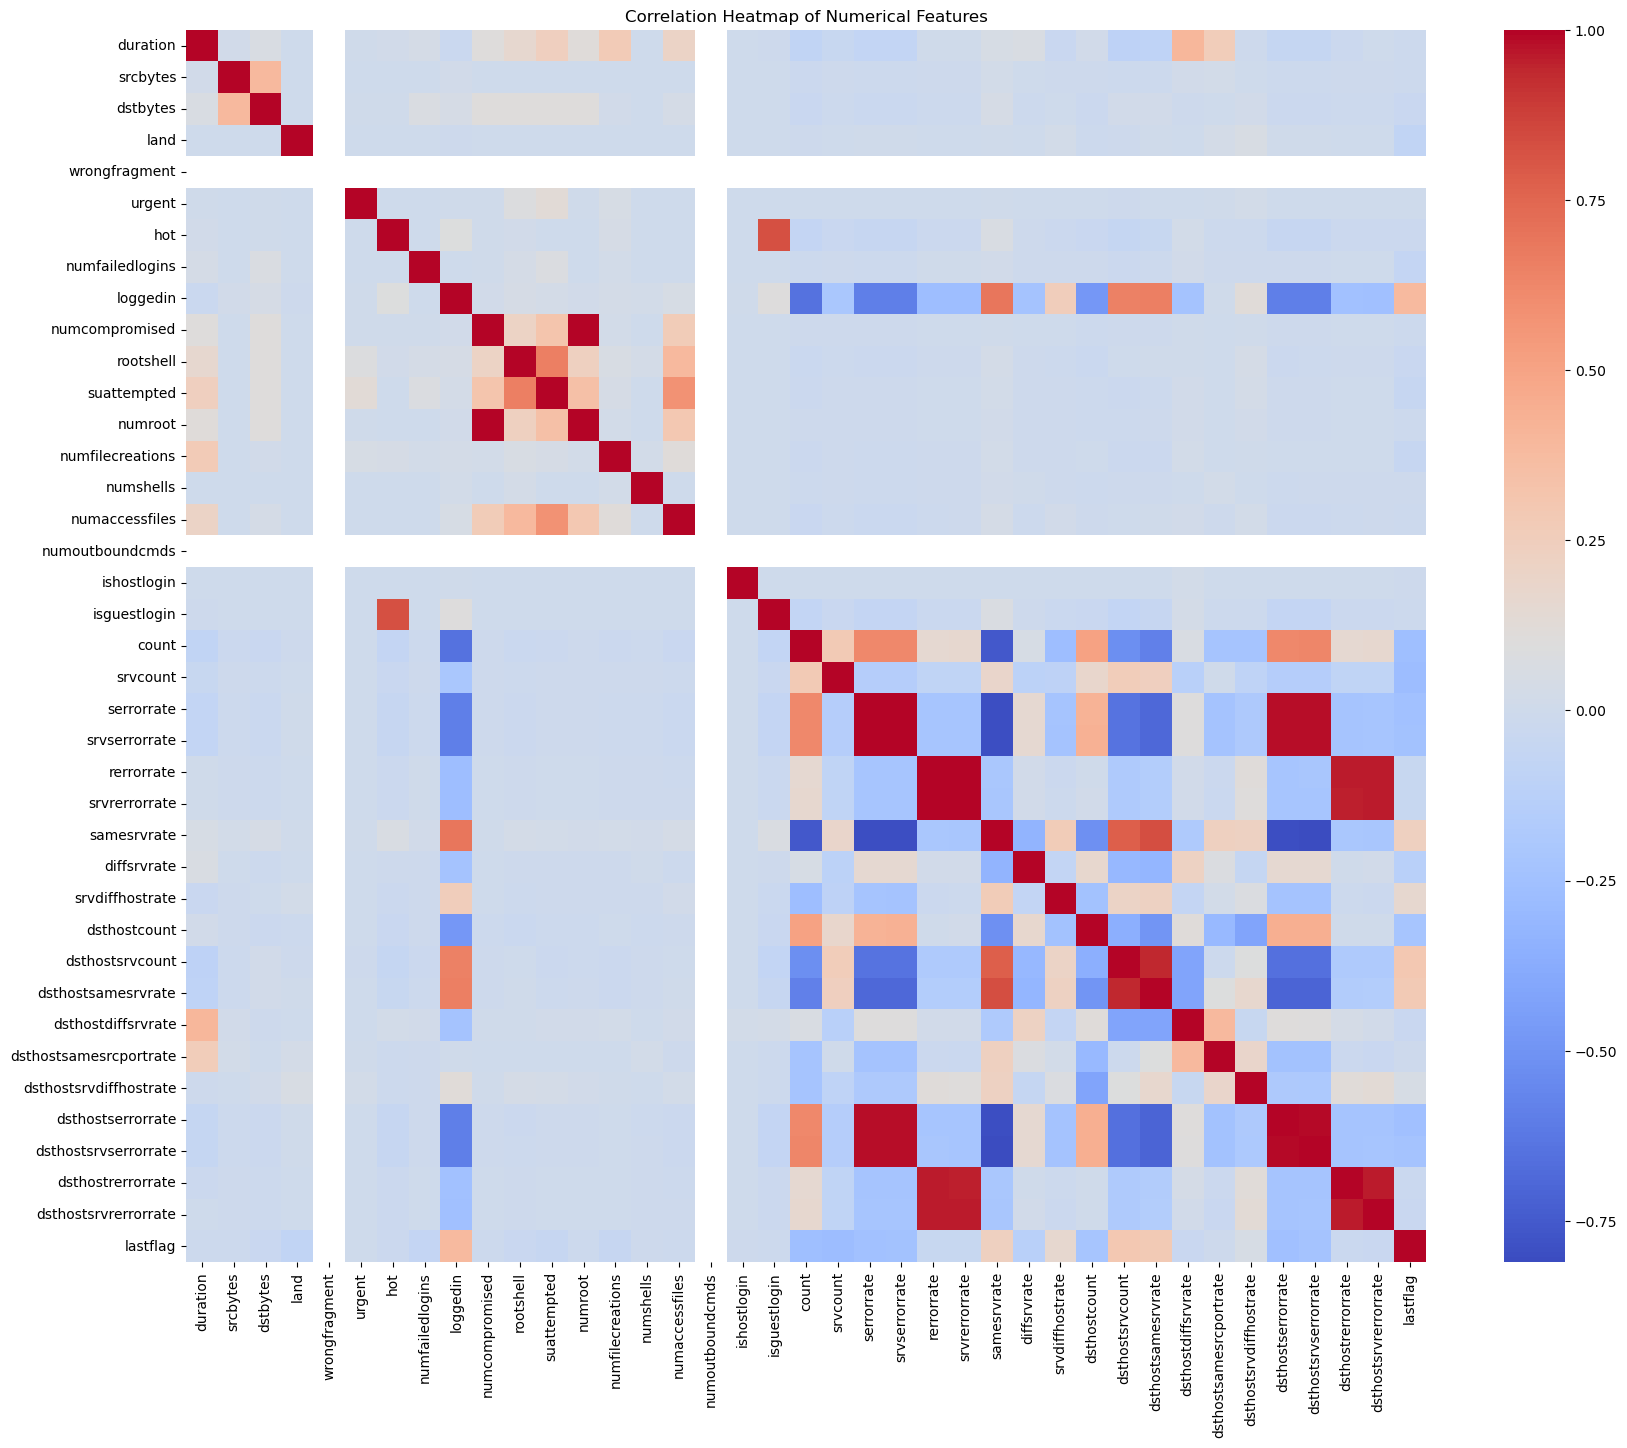

In [75]:
plt.figure(figsize=(20,16))
sns.heatmap(train[numerical].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Feature Engineering

In [11]:
error_rt = ['serrorrate', 'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'srvdiffhostrate', 'samesrvrate']
dst_host_error_rt = ['dsthostserrorrate', 'dsthostsrvserrorrate', 'dsthostdiffsrvrate']
num_features = ['numcompromised', 'numaccessfiles', 'numoutboundcmds','numroot']

def merge_columns(df, columns, new_column_name):
    if all(col in df.columns for col in columns):
        df[new_column_name] = df[columns].mean(axis=1)
        df.drop(columns=columns, inplace=True)
    else:
        missing_cols = [col for col in columns if col not in train.columns]
        print(f"Columns {missing_cols} not found in the dataframe and will not be merged.")


merge_columns(train, error_rt, 'merged_error_rates')
merge_columns(train, dst_host_error_rt, 'merged_dst_host_error_rates')
merge_columns(train, num_features, 'merged_num_features')

merge_columns(test, error_rt, 'merged_error_rates')
merge_columns(test, dst_host_error_rt, 'merged_dst_host_error_rates')
merge_columns(test, num_features, 'merged_num_features')

print(train)

       duration protocoltype      service flag  srcbytes  dstbytes  land  \
0             0          tcp  netbios_dgm  REJ         0         0     0   
1             0          tcp         smtp   SF      1239       400     0   
2             0          tcp         http   SF       222       945     0   
3             0          tcp         http   SF       235      1380     0   
4             0          tcp    uucp_path  REJ         0         0     0   
...         ...          ...          ...  ...       ...       ...   ...   
86840         0          tcp         http   SF       216       674     0   
86841         0          tcp         http   SF       368      1725     0   
86842        28          tcp          ftp   SF      1483      4152     0   
86843         0          tcp         smtp   SF      1679       385     0   
86844     11343          tcp       telnet   SF      3396     16694     0   

       wrongfragment  urgent  hot  ...  dsthostsamesrvrate  \
0                  0     

### Re-ploting Correlation Matrix

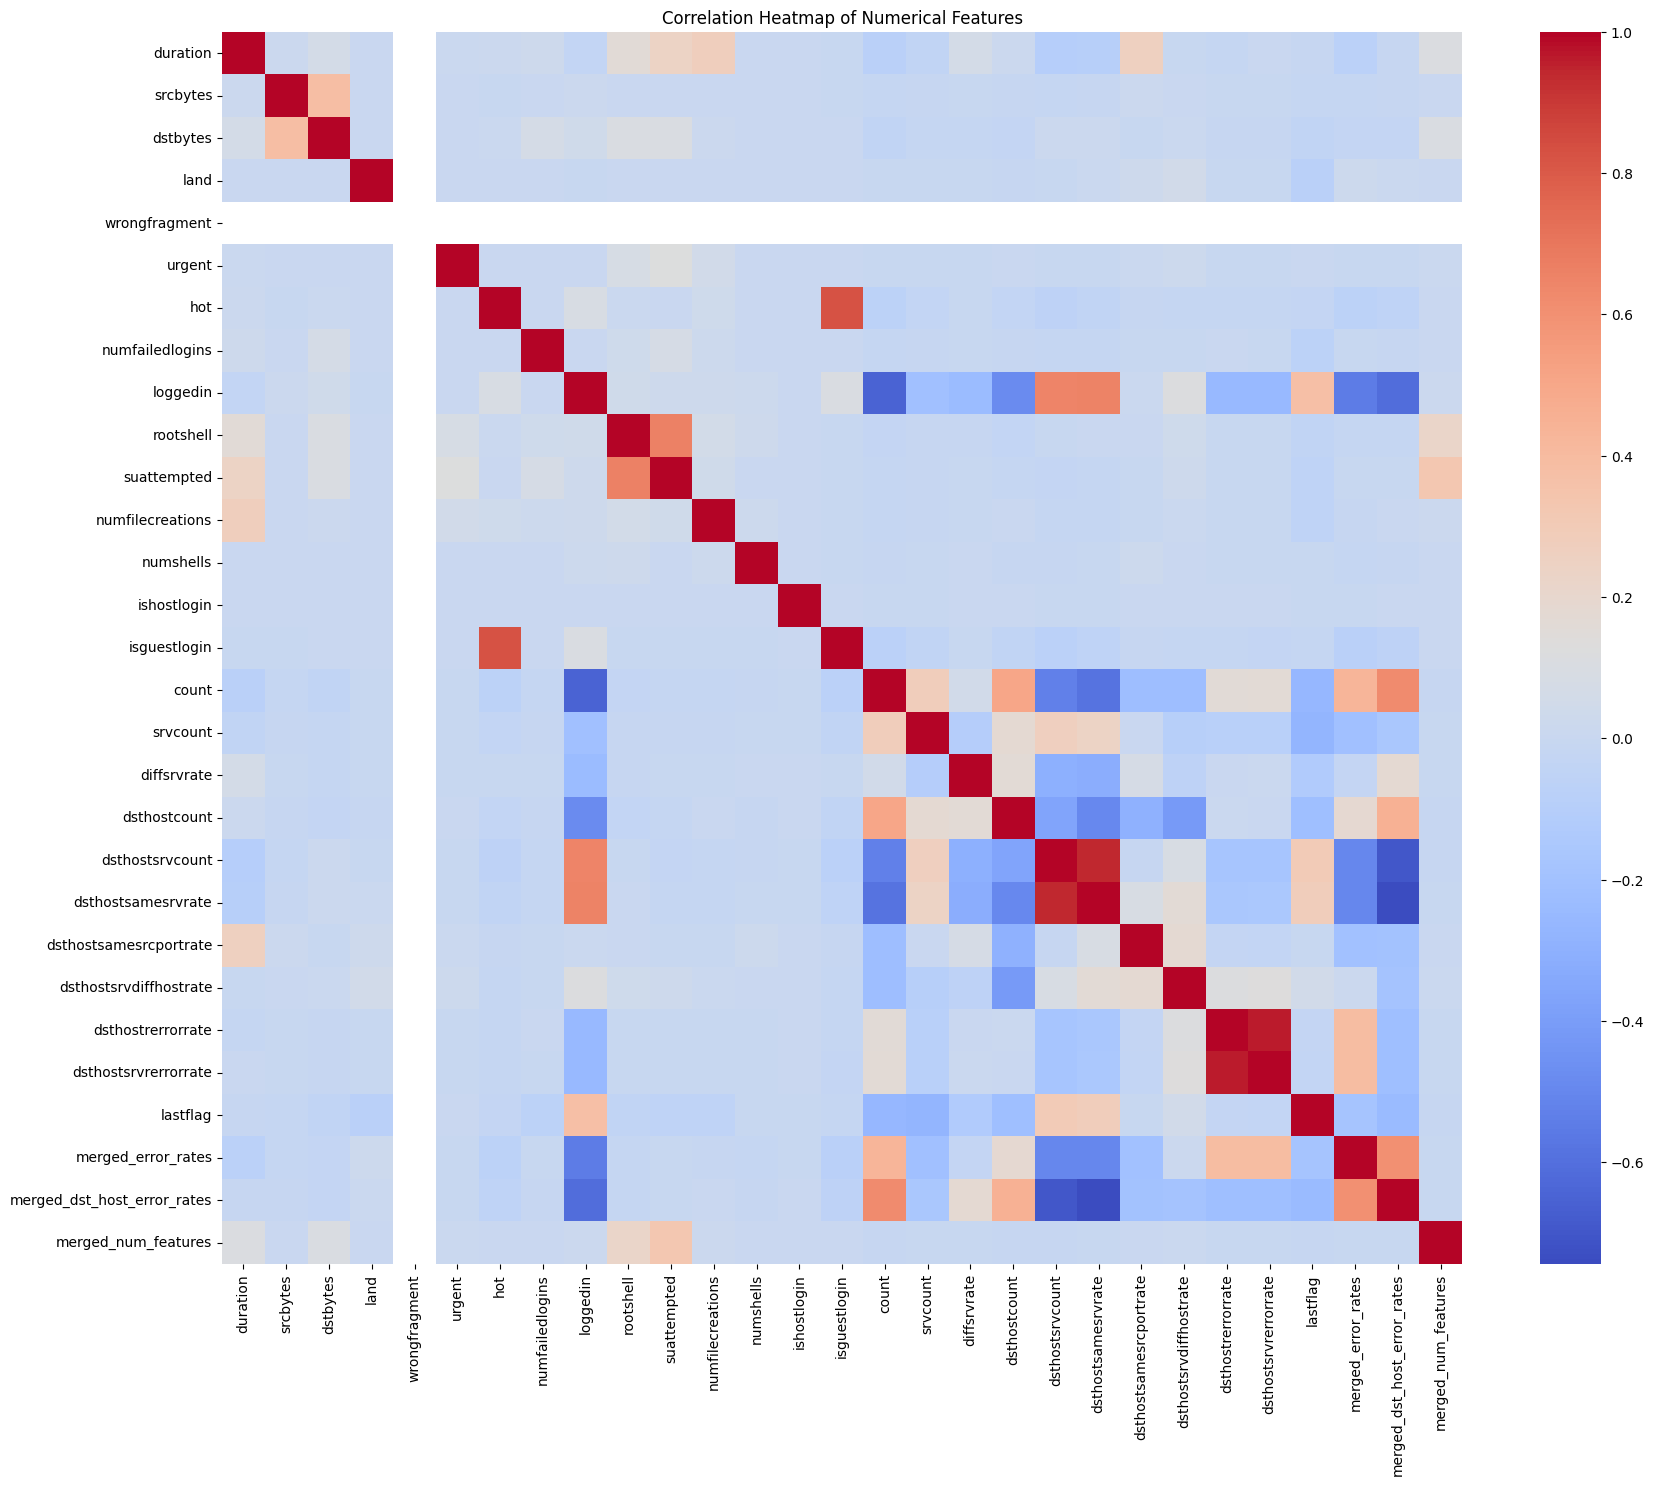

In [12]:
num_cols = train.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(20,16))
sns.heatmap(train[num_cols].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# <b> PHASE 2

### Encoding 

In [78]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

cat_cols = ['protocoltype', 'service', 'flag']
for col in cat_cols:
    train[col] = train[col].astype(str)
    test[col] = test[col].astype(str)


for col in cat_cols:
    le = LabelEncoder()
    combined_data = pd.concat([train[col], test[col]], axis=0)
    le.fit(combined_data)
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Mapping for {col}: {mapping}")
print(train)

attack_mapping = {'normal': 0, 'neptune': 1}
train['attack_encoded'] = train['attack'].map(attack_mapping)

Mapping for protocoltype: {'icmp': 0, 'tcp': 1, 'udp': 2}
Mapping for service: {'IRC': 0, 'X11': 1, 'Z39_50': 2, 'auth': 3, 'bgp': 4, 'courier': 5, 'csnet_ns': 6, 'ctf': 7, 'daytime': 8, 'discard': 9, 'domain': 10, 'domain_u': 11, 'echo': 12, 'eco_i': 13, 'ecr_i': 14, 'efs': 15, 'exec': 16, 'finger': 17, 'ftp': 18, 'ftp_data': 19, 'gopher': 20, 'hostnames': 21, 'http': 22, 'http_443': 23, 'imap4': 24, 'iso_tsap': 25, 'klogin': 26, 'kshell': 27, 'ldap': 28, 'link': 29, 'login': 30, 'mtp': 31, 'name': 32, 'netbios_dgm': 33, 'netbios_ns': 34, 'netbios_ssn': 35, 'netstat': 36, 'nnsp': 37, 'nntp': 38, 'ntp_u': 39, 'other': 40, 'pop_2': 41, 'pop_3': 42, 'printer': 43, 'private': 44, 'red_i': 45, 'remote_job': 46, 'rje': 47, 'shell': 48, 'smtp': 49, 'sql_net': 50, 'ssh': 51, 'sunrpc': 52, 'supdup': 53, 'systat': 54, 'telnet': 55, 'tftp_u': 56, 'tim_i': 57, 'time': 58, 'urh_i': 59, 'urp_i': 60, 'uucp': 61, 'uucp_path': 62, 'vmnet': 63, 'whois': 64}
Mapping for flag: {'OTH': 0, 'REJ': 1, 'RSTO'

### Scaling and Splitting data 

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=train.drop(columns=['attack_encoded','attack'], axis=1)
y=train['attack_encoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
test_scaled = pd.DataFrame(test_scaled, columns=test.columns)

X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.33, random_state=42)

### Principal Component Analysis

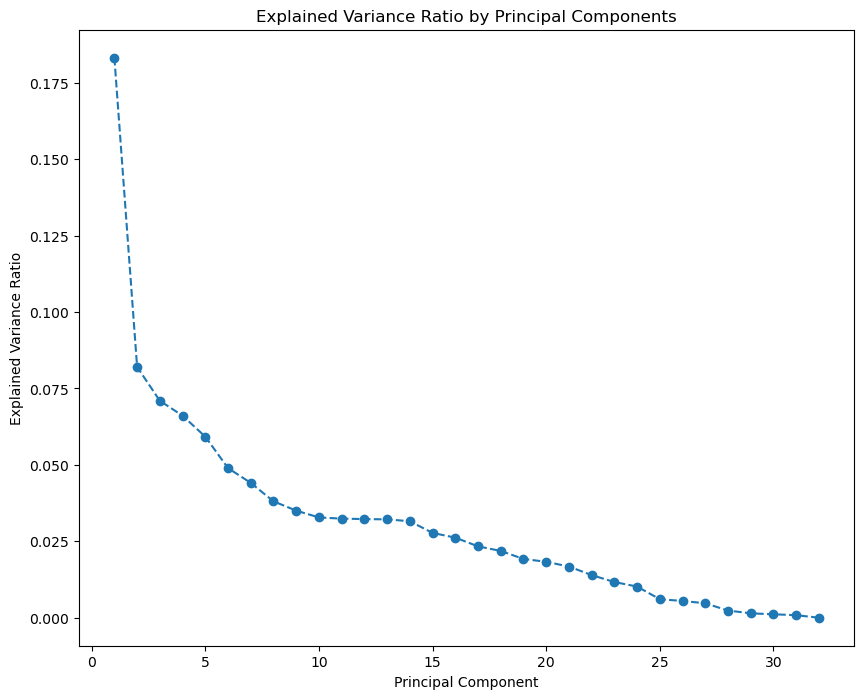

In [80]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

### Hyperparameter Tuning using Randomized Search

In [81]:
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_recall_fscore_support

rf = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': [10, 50, 100, 200, 250],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=10, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print(f"Best parameters found: {best_params}")

Best parameters found: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': False}


### Implementing Random Forests & Cross Validation Score Calculation

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_best= RandomForestClassifier(**best_params, random_state=42)
rf_best.fit(X_train, y_train)

k = 10
cv_scores = cross_val_score(rf, X_train, y_train, cv=k)
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print(f"Cross-validation mean score: {cv_mean}")
print(f"Cross-validation standard deviation: {cv_std}")


Cross-validation mean score: 0.9999656268795262
Cross-validation standard deviation: 6.874624126492e-05


# <b>PHASE 3

### Calculating F1 Score

In [83]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

y_preds_rf = rf_best.predict(X_test)

score_rf = f1_score(y_test, y_preds_rf)
print(f"F1 of Random Forest Classifier: {score_rf}")

F1 of Random Forest Classifier: 0.9999080966822902


### AUC-ROC Score

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

y_pred_prob = rf_best.predict_proba(X_test)[:,1]
auc_roc = roc_auc_score(y_test, y_pred_prob)

print(f'AUC-ROC score: {auc_roc}')

AUC-ROC score: 0.999999968983018


### Preparing Submission File

In [85]:
submission = pd.read_csv('Sample_Submission.csv')
submission['attack'] = rf_best.predict(test_scaled)
submission.to_csv('submission(3)_rfc.csv', index=False)